<a href="https://colab.research.google.com/github/RickyLi15/Heart-Failure-Prediction/blob/main/Spring_2022_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Methods for Predicting Heart Failure
### BigTh!nk AI Spring 2022
Data from https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data?resource=download

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns

IMPORTANT: Please be sure to make your own copy of the notebook before running anything!

# Data Collection
In order to train a model, you first need data. Load in the requisite CSVs here.

In [ ]:
### DO NOT MODIFY THIS CELL ###
!git clone https://github.com/BigThinkAI/spring2022-project-data.git
#!rm -rf ./spring2022-project-data/heart_failure_test.csv

DATA_CSV = '/content/spring2022-project-data/heart_failure_test.csv'

Cloning into 'spring2022-project-data'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 18 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (18/18), done.


In [ ]:
# Your code here
data_set = pd.read_csv(DATA_CSV)


# Feature Engineering
In this part, you want to explore the data your given and see what features you can extract that will be useful for prediction.

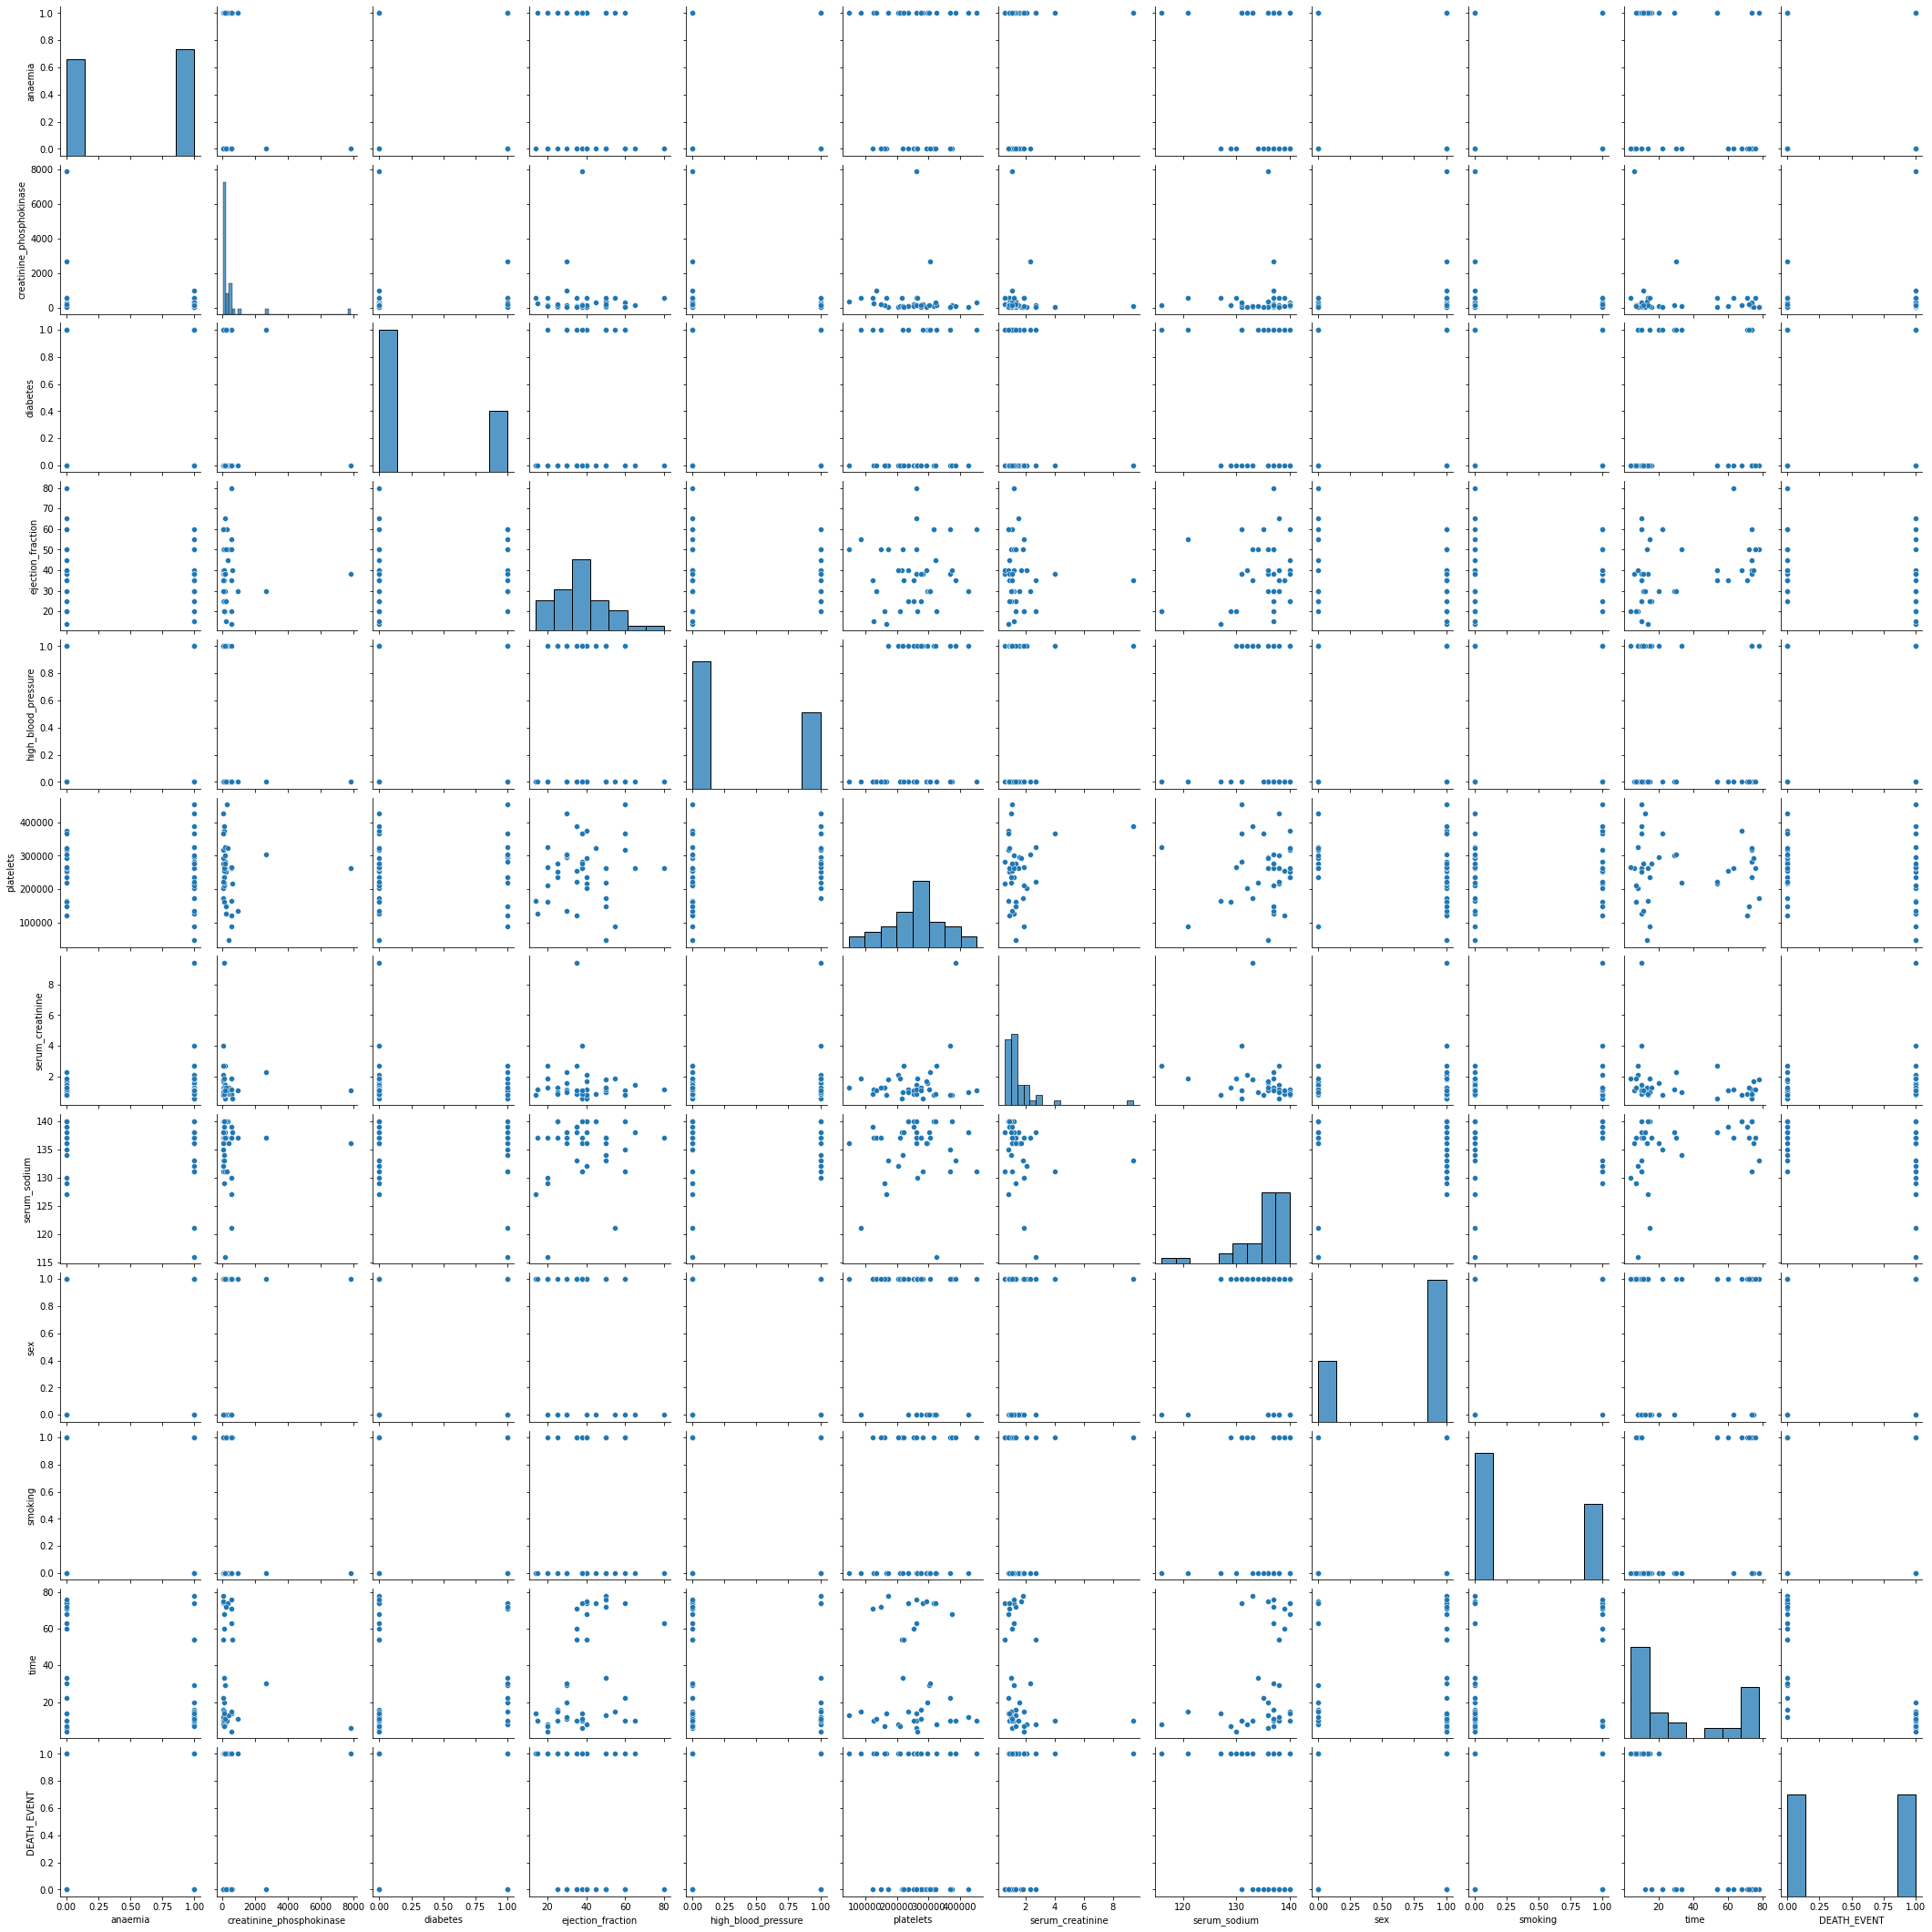

In [ ]:
# Your code here
data_set = pd.read_csv(DATA_CSV)


#import seaborn as sns
sns.pairplot(data_set.iloc[:, 2:14]) #created a pair plot to see if there were any apparent correlations between data (any diagonal lines in the plot) but doesn't seem to be much
# The histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and
# lower triangles show the relationship (or lack thereof) between two variables.
# Source: https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166

# Model Selection
Pick a model, whichever you choose! Train it up and see how it runs.

In [ ]:
# Your code here
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

feature_cols = ['age','sex', 'diabetes', 'time', 'high_blood_pressure', 'serum_sodium', 'creatinine_phosphokinase', 'ejection_fraction'] #uses these features from the dataset
X = data_set[feature_cols]
Y = data_set.DEATH_EVENT
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=1) # 50% training and 50% test
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, Y_train)   #trains the decision tree model using the train set
print("Classifiers trained")

Classifiers trained


# Testing Your Model
While we're assessing you specifically on the trace of your confusion matrix, you're still required to present your methodology. With that in mind, do not hesitate to use a variety of metrics to justify your choices.

In [ ]:
### DO NOT MODIFY THIS CELL ###

import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confmat(true_labels, pred_labels):
  """
  Plots a confusion matrix from given data and returns its trace
  """
  fig2, ax = plt.subplots(1, 1, num=2, figsize=(10, 10))

  cm = confusion_matrix(true_labels, pred_labels)
  cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # normalize the confusion matrix
  for pair in np.argwhere(np.isnan(cm_norm)):
    cm_norm[pair[0]][pair[1]] = 0
  cm_score = np.trace(cm_norm)

  annot = np.zeros_like(cm, dtype=object)
  for i in range(annot.shape[0]):  # Creates an annotation array for the heatmap
    for j in range(annot.shape[1]):
      annot[i][j] = f'{cm[i][j]}\n{round(cm_norm[i][j] * 100, ndigits=3)}%'

  ax = sns.heatmap(cm_norm, annot=annot, fmt='', cbar=True, cmap=plt.cm.magma, vmin=0, ax=ax) # plot the confusion matrix

  ax.set(title=f'CM Score = {cm_score}', xlabel='Predicted Label', ylabel='Actual Label')

  fig2.tight_layout()

  return cm_score

Decision Tree Confusion Matrix
Accuracy: 0.95


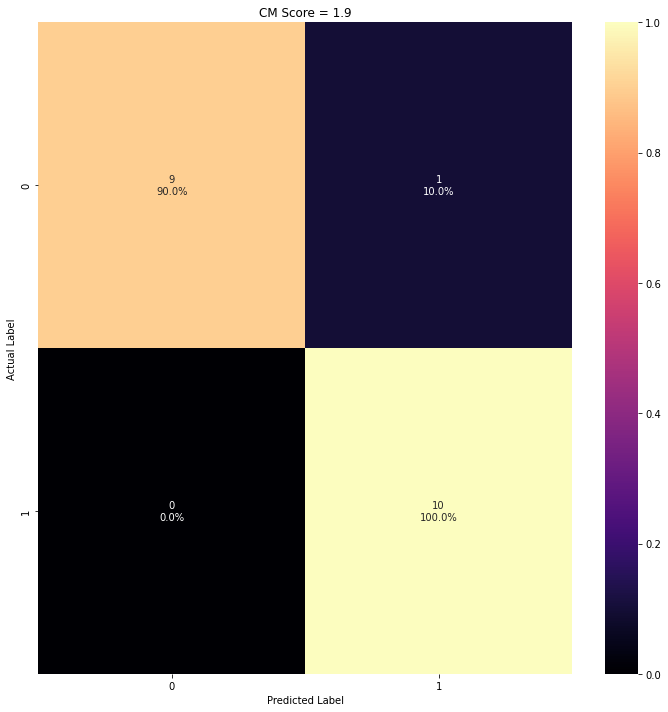

In [ ]:
# Your code here
dtree_preds = dtree.predict(X_test) #creates predicted values based on the test set of the labels we use
print('Decision Tree Confusion Matrix')
plot_confmat(Y_test, dtree_preds) # plots the confusion matrix with the actual labels being the testing set from the 'DEATH_EVENT' column
# and the predicted labels being the predictions that our decision tree made above

Y_pred = dtree.predict(X_test) # predicts death event for the train set
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred)) # compares the predicted death event with the actual death event
# to check the accuracy score



# Submission
Once you've made a final model that you're happy with, please save it out with the following function. You will then upload this notebook (as an ```.ipynb``` file) and the saved model file using [this form](https://forms.gle/aZudRC8t1e5ffqcPA).

NOTE: You only get one submission per team, so make sure that you're happy with everything before you submit the model. Also, while we'll take submissions that aren't pickle files (i.e. if you use a neural net or something), you have to figure out how to save it on your own.

In [ ]:
import pickle

def save_model(model, filename):
  with open(f'{filename}.pkl', 'wb') as f:
    pickle.dump(model, f)

  print(f'Model saved to {filename}.pkl!')

In [ ]:
save_model(dtree, 'Edwin_Ricky_Final_Model')

Model saved to Edwin_Ricky_Final_Model.pkl!
